In [1]:
from pathlib import Path
import sys

sys.path.append(str(Path('').absolute().parent))

In [2]:
from scripts.morgan_handler import get_morgan_fingerprints

morgan_fp, df_labels = get_morgan_fingerprints()

In [3]:
morgan_fp.shape

(5175, 2048)

In [4]:
df_labels

,labels,chembl_ids,fingerprint_id
0,1,CHEMBL301018,0
1,1,CHEMBL281543,1
2,1,CHEMBL401930,2
3,0,CHEMBL274654,3
4,1,CHEMBL382822,4
...,...,...,...
5170,1,CHEMBL1645470,5170
5171,1,CHEMBL1683960,5171
5172,0,CHEMBL1765740,5172
5173,1,CHEMBL112225,5173


Contando o número de moléculas associadas a cada uma das labels, podemos observar que há quase o dobro de inibidores em relação aos não inibidores.

In [5]:
df_labels['labels'].value_counts()

1    3553
0    1622
Name: labels, dtype: int64

### Histograma de Frequência de ativação de bits

Esse histograma mostra como é a distribuição da frequência de ativação dos bits.

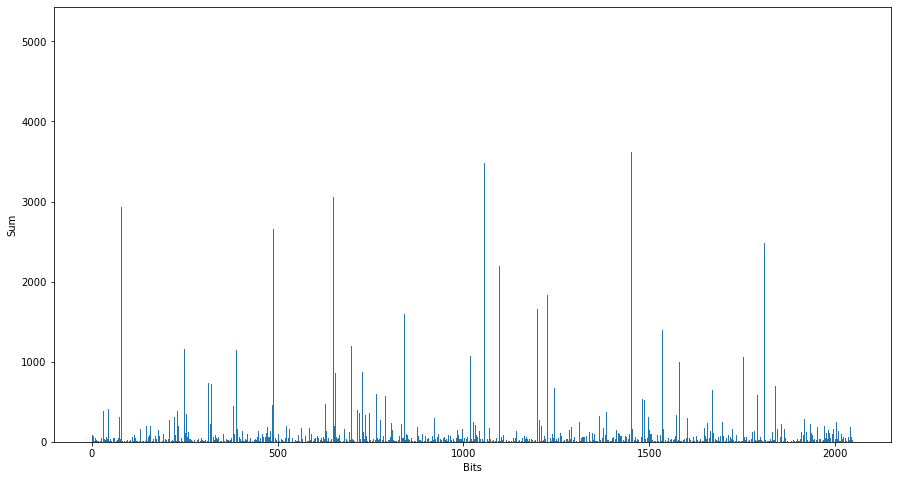

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

fig = plt.figure(figsize=(15,8))
sum_bits = morgan_fp.sum(axis=0)
plt.bar(list(range(sum_bits.shape[0])), sum_bits)
plt.xlabel('Bits')
plt.ylabel('Sum')
plt.show()

### Bits mais ativados entre os inibidores e entre os não inibidores

O histograma abaixo ilustra a frequência relativa média de vezes que cada bit é ativado por proteínas inibidoras e não inibidoras.

In [7]:
import numpy as np

labels = np.array(list(df_labels['labels']))

dataset = np.hstack((labels.reshape((-1, 1)), morgan_fp))

inhibitors_mean_activation = dataset[dataset[:, 0] == 1][:, 1:].mean(axis=0)
non_inhibitors_mean_activation = dataset[dataset[:, 0] == 0][:, 1:].mean(axis=0)

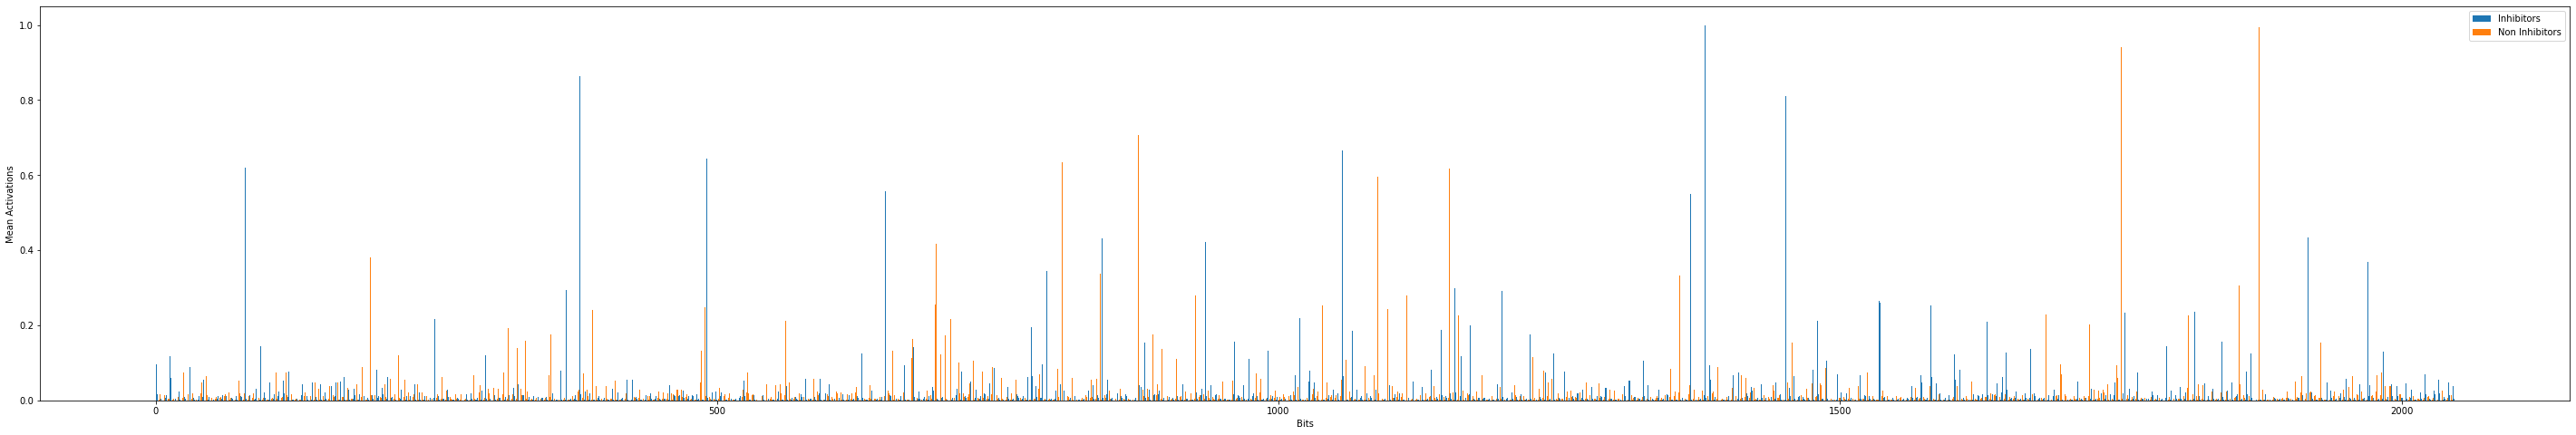

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(50,8))
n = 2048
x = np.arange(n)
width = 0.4
bar1 = ax.bar(x - width/2, inhibitors_mean_activation, width, label='Inhibitors')
bar2 = ax.bar(x + width/2, non_inhibitors_mean_activation, width, label='Non Inhibitors')

ax.set_xlabel('Bits')
ax.set_ylabel('Mean Activations')
ax.legend()
plt.show()

Quais são os bits mais frequetemente ativados entre os inibidores?

In [66]:
indeces = np.array(list(range(inhibitors_mean_activation.shape[0])))

inhibitors_indeces = indeces[inhibitors_mean_activation > 0.2]

print('Most activated bits on inhibitors', inhibitors_indeces)

Most activated bits on inhibitors [  80  191  249  329  366  378  389  489  491  561  650  673  694  695
  699  703  708  794  807  841  843  875  888  926  935 1019 1039 1057
 1088 1097 1152 1157 1199 1226 1357 1367 1380 1452 1480 1535 1536 1581
 1631 1683 1750 1754 1810 1816 1855 1873 1917 1928 1970]


Quais são os bits mais frequetemente ativados entre os não inibidores?

In [67]:
non_inhibitors_indeces = indeces[non_inhibitors_mean_activation > 0.2]

print('Most activated bits on non inhibitors', non_inhibitors_indeces)

Most activated bits on non inhibitors [  80  191  249  378  389  489  491  561  650  694  695  708  807  841
  843  875  926  935 1039 1057 1088 1097 1114 1152 1160 1171 1199 1357
 1380 1452 1536 1683 1722 1750 1810 1816 1855 1873 1917 1970]


Queremos saber quais são os bits mais ativados apenas dentre os inibidores. Portanto, vamos criar uma lista com os índices desses bits.

In [68]:
bits_inhibitors_only = sorted(list(set(inhibitors_indeces) - set(non_inhibitors_indeces)))
print(bits_inhibitors_only)

[329, 366, 673, 699, 703, 794, 888, 1019, 1157, 1226, 1367, 1480, 1535, 1581, 1631, 1754, 1928]


In [76]:
bits_non_inhibitors_only = list(set(non_inhibitors_indeces) - set(inhibitors_indeces))
print(bits_non_inhibitors_only)

[1160, 1722, 1171, 1114]


In [72]:
import json 
with open('../data/bit_info.json', 'r') as file:
    chembl_to_bitinfo = json.load(file)

In [69]:
df_smiles = pd.read_csv('../data/egfr_erbB1_smiles.csv', index_col=0)
df_smiles

,chembid,smiles_notation
0,CHEMBL301018,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OC
1,CHEMBL281543,C=CC(=O)Nc1nc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1CCCCN...
2,CHEMBL401930,Cc1cc(N2CCOCC2)cc2[nH]c(-c3c(NC[C@@H](O)c4cccc...
3,CHEMBL274654,Cc1[nH]c(/C=C2\C(=O)Nc3ccccc32)c(C)c1CCC(=O)O
4,CHEMBL382822,COc1cc2ncnc(Nc3cccc(Cl)c3F)c2cc1CN1CCC[C@@H]1C...
...,...,...
5173,CHEMBL1645470,Cc1cccc(Nc2ncnn3ccc(CN4CCC(N)CC4)c23)c1
5174,CHEMBL1683960,Cc1ncnc(Nc2ccc(OCc3cccc(F)c3)c(Cl)c2)c1-c1cccc...
5175,CHEMBL1765740,CNc1nc(-c2ccc3c(N)n[nH]c3c2)cc(N2C[C@@H](C(=O)...
5176,CHEMBL112225,COc1cc2ncc(C#N)c(Nc3cccc(Br)c3C)c2cc1OC


In [70]:
chembl_inhibitors = df_labels['chembl_ids'][df_labels['labels'] == 1]
chembl_non_inhibitors = df_labels['chembl_ids'][df_labels['labels'] == 0]

In [71]:
df_smiles_non_inhibitors = df_smiles[df_smiles['chembid'].isin(chembl_non_inhibitors)]
df_smiles_inhibitors = df_smiles[df_smiles['chembid'].isin(chembl_inhibitors)]
df_smiles_inhibitors

,chembid,smiles_notation
0,CHEMBL301018,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OC
1,CHEMBL281543,C=CC(=O)Nc1nc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1CCCCN...
2,CHEMBL401930,Cc1cc(N2CCOCC2)cc2[nH]c(-c3c(NC[C@@H](O)c4cccc...
4,CHEMBL382822,COc1cc2ncnc(Nc3cccc(Cl)c3F)c2cc1CN1CCC[C@@H]1C...
7,CHEMBL213874,COc1cc2ncnc(Nc3cccc(Cl)c3F)c2cc1OCC1CCN(C)CC1
...,...,...
5172,CHEMBL1630111,Nc1ccccc1NC(=O)c1ccc(-c2ccc3ncnc(Nc4ccc(OCc5cc...
5173,CHEMBL1645470,Cc1cccc(Nc2ncnn3ccc(CN4CCC(N)CC4)c23)c1
5174,CHEMBL1683960,Cc1ncnc(Nc2ccc(OCc3cccc(F)c3)c(Cl)c2)c1-c1cccc...
5176,CHEMBL112225,COc1cc2ncc(C#N)c(Nc3cccc(Br)c3C)c2cc1OC


In [73]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import (Draw,
                        Descriptors,
                        AllChem)


def get_mol(chembl, df_smiles):
    smiles = df_smiles[df_smiles['chembid'] == chembl].iloc[0,1]
    mol = Chem.MolFromSmiles(smiles)
    return mol

def plot_activated_bit(chembl, bit_index, df_smiles):
    mol = get_mol(chembl, df_smiles)
    bit_info = chembl_to_bitinfo[chembl]        
    if not bit_info.get(str(bit_index), None):        
        return None
    
    mgfp_bit = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2,
                                                      nBits=2048,
                                                      bitInfo=bit_info)

    svg = Draw.DrawMorganBit(mol, bit_index, bit_info, useSVG=True)
    return svg

## Trechos de moléculas que ativam bits de inibidores

Aqui plotamos os trechos relacionados a bits ativados com frequência por inibidores.

Mecule: CHEMBL301018  -- bit index: 329


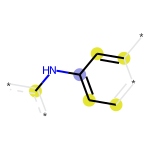

----------------------------------------------------------------------------------------------------
Mecule: CHEMBL281543  -- bit index: 366


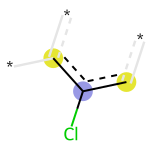

----------------------------------------------------------------------------------------------------
Mecule: CHEMBL382822  -- bit index: 673


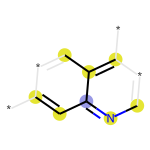

----------------------------------------------------------------------------------------------------
Mecule: CHEMBL213874  -- bit index: 699


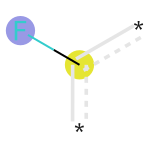

----------------------------------------------------------------------------------------------------
Mecule: CHEMBL128468  -- bit index: 703


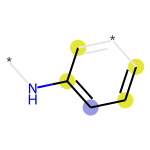

----------------------------------------------------------------------------------------------------
Mecule: CHEMBL385471  -- bit index: 794


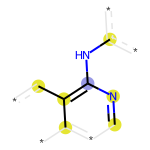

----------------------------------------------------------------------------------------------------
Mecule: CHEMBL53665  -- bit index: 888


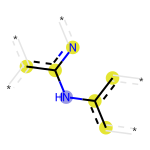

----------------------------------------------------------------------------------------------------
Mecule: CHEMBL25425  -- bit index: 1019


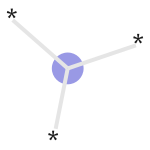

----------------------------------------------------------------------------------------------------
Mecule: CHEMBL401930  -- bit index: 1157


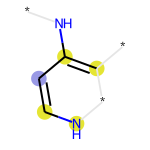

----------------------------------------------------------------------------------------------------
Mecule: CHEMBL554566  -- bit index: 1226


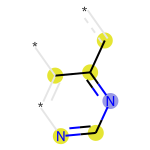

----------------------------------------------------------------------------------------------------
Mecule: CHEMBL66570  -- bit index: 1367


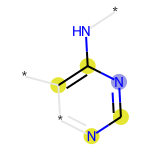

----------------------------------------------------------------------------------------------------
Mecule: CHEMBL939  -- bit index: 1480


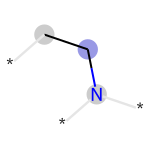

----------------------------------------------------------------------------------------------------
Mecule: CHEMBL113901  -- bit index: 1535


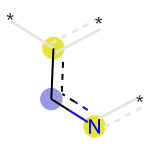

----------------------------------------------------------------------------------------------------
Mecule: CHEMBL55979  -- bit index: 1581


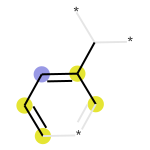

----------------------------------------------------------------------------------------------------
Mecule: CHEMBL35820  -- bit index: 1631


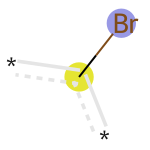

----------------------------------------------------------------------------------------------------
Mecule: CHEMBL243628  -- bit index: 1754


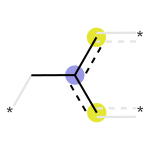

----------------------------------------------------------------------------------------------------
Mecule: CHEMBL31373  -- bit index: 1928


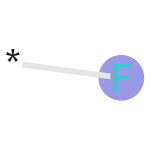

----------------------------------------------------------------------------------------------------


In [74]:
for index in bits_inhibitors_only:       
    for chembid in df_smiles_inhibitors['chembid']:                
        # display(Draw.MolToImage(get_mol(chembid)))
        img = plot_activated_bit(chembid, index, df_smiles_inhibitors)
        if img:
            print('Mecule:', chembid, ' -- bit index:', index)
            display(img)
            break
    
    print('-'*100)

## Trechos de moléculas que ativam bits de não inibidores

Aqui plotamos os trechos relacionados a bits ativados com frequência por não inibidores.

Mecule: CHEMBL67424  -- bit index: 1160


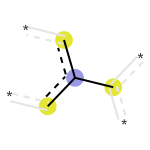

----------------------------------------------------------------------------------------------------
Mecule: CHEMBL274654  -- bit index: 1722


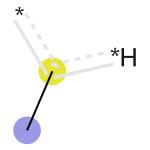

----------------------------------------------------------------------------------------------------
Mecule: CHEMBL119987  -- bit index: 1171


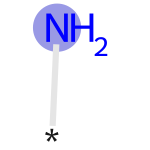

----------------------------------------------------------------------------------------------------
Mecule: CHEMBL89646  -- bit index: 1114


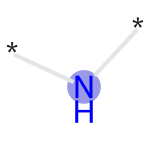

----------------------------------------------------------------------------------------------------


In [75]:
for index in bits_non_inhibitors_only:       
    for chembid in df_smiles_non_inhibitors['chembid']:                
        # display(Draw.MolToImage(get_mol(chembid)))
        img = plot_activated_bit(chembid, index, df_smiles_non_inhibitors)
        if img:
            print('Mecule:', chembid, ' -- bit index:', index)
            display(img)
            break
    
    print('-'*100)